In [1]:
# !git add chapter2_classifiers.ipynb
# !git commit -m "Chapter 2: classifiers with scikit learn"
# !git push

In [2]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
x=iris.data[:,[2,3]]
y=iris.target
print("class labels:",np.unique(y))

class labels: [0 1 2]


In [3]:
  # The np.unique(y) function returned the three unique class labels stored in iris.target

In [4]:
##splitting the dataset into training and testing dataset using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [5]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [6]:
##scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.fit_transform(x_test)

In [7]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.1,random_state=1)
ppn.fit(x_train_std,y_train)

Perceptron(eta0=0.1, random_state=1)

In [8]:
y_pred=ppn.predict(x_test_std)
print('misclassified examples:%d' % (y_test !=y_pred).sum())


misclassified examples:1


In [10]:
# !git add chapter2_classifiers.ipynb
# !git commit -m "24/07/2025 classifiers using scikit learn"
# !git push


In [12]:
##checking accuracy of model
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
      

Accuracy: 0.978


In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np  # Added numpy import which was missing

def plot_decision_regions(x, y, classifier, test_idx=None,
                         resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0],
                   y=x[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=f'Class {cl}',
                   edgecolor='black')
    
    # highlight test examples
    if test_idx:
        # plot all examples
        x_test, y_test = x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:, 0], x_test[:, 1],
                   c='none', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='Test set')

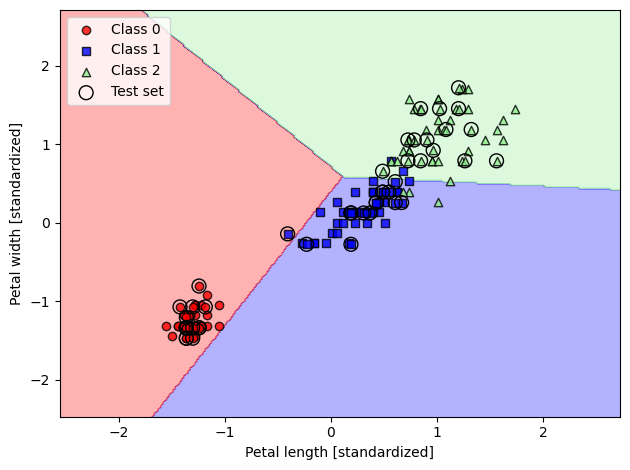

In [18]:
 >>> x_combined_std = np.vstack((x_train_std, x_test_std))
 >>> y_combined = np.hstack((y_train, y_test))
 >>> plot_decision_regions(x=x_combined_std,
 ...
                       y=y_combined,
 ...
 ...
                       classifier=ppn,
                       test_idx=range(105, 150))
 >>> plt.xlabel('Petal length [standardized]')
 >>> plt.ylabel('Petal width [standardized]')
 >>> plt.legend(loc='upper left')
 >>> plt.tight_layout()
 >>> plt.show()

In [19]:
##from this graph wecan clearly see that the classes are not perfectly linearly separable and that why perceptron algorithm
#generally because it only works when the classes are perfectly linearly separable

In [20]:
####From here we will be learning Logistic Regression

In [21]:
#Logistic Regression

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yogendra singh\AppData\Local\Temp\ipykernel_28248\3582460166.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma (z)$')


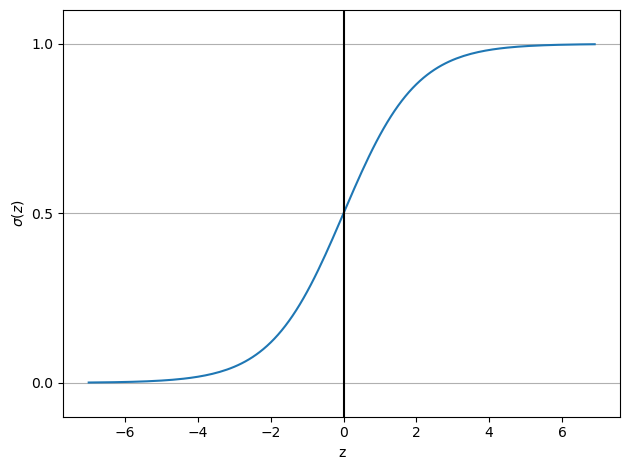

In [24]:
#plotting a sigmoid function for some value 7 to -7
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z=np.arange(-7,7,0.1)
sigma_z=sigmoid(z)
plt.plot(z,sigma_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yogendra singh\AppData\Local\Temp\ipykernel_28248\1387446972.py:15: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma(z)$')


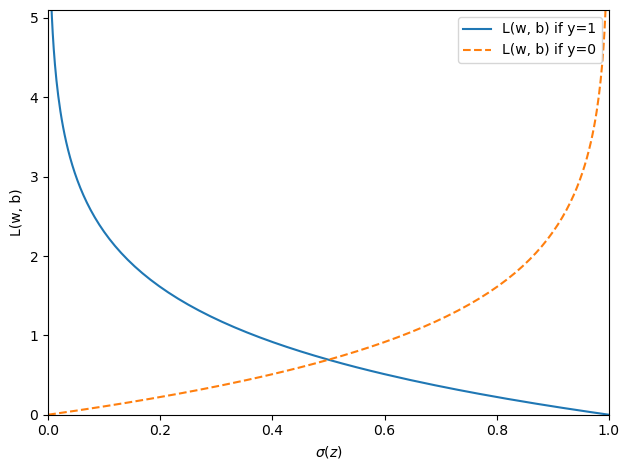

In [26]:
def loss_1(z):
 ...     
 return - np.log(sigmoid(z))
def loss_0(z):
 ...     
 return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [27]:
!git add Chapter2_classifiers.ipynb
!git commit -m "25/07/2025:continuous of Logistic regression algorithm"
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Machine_learning.ipynb
	modified:   chapter2_classifiers.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Iris.csv
	anaconda_projects/

no changes added to commit (use "git add" and/or "git commit -a")


Everything up-to-date
